In [20]:
using Plots
using FileIO
using JLD2
using Base.Threads
#Pkg; Pkg.add("DistributedArrays")
println("nthreads = $(nthreads())")
using Printf
using LaTeXStrings

nthreads = 2


In [21]:
include("aux_functions.jl")

bump_x (generic function with 1 method)

In [35]:
l_pulse = false
r_pulse = false
c_pulse = false
#l_pulse = true 
#r_pulse = true
c_pulse = true

file_name=fill("",6)

if l_pulse
    file_name = "Results/l_pulse_401_401.jld2"
elseif r_pulse
    file_name = "Results/r_pulse_401_401.jld2"
elseif c_pulse
    file_name[1] = "Results/c_pulse_11_401.jld2"
    file_name[2] = "Results/c_pulse_11_801.jld2"
    file_name[3] = "Results/c_pulse_11_1601.jld2"
    file_name[4] = "Results/c_pulse_11_3201.jld2"
end

function get_data(file_name, coarse_factor=1)
    i = coarse_factor
    data = load(file_name)
    run_name = data["run_name"]
    @show (x0,x1,p_bump,A) = data["par_init"]
    @show (Nl, L, dl, Nr, R, dr) = data["par_grid"]
    @show (t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"]
    r = [L + dr*(i-1) for i in 1:2^(i-1):Nr]
    l = [L + dr*(i-1) for i in 1:dl*(i-1) for i in 1:2^(i-1):Nl]
    t = [dt_d*(i-1) for i in 1:2^(i-1):M_d]
    u = [u_d*(i-1) for i in 1:dt_d*(i-1) for i in 1:2^(i-1):M_d]

    v = zeros(3Nl+3Nr,M_d)
    for j in 1:2^(i-1):M_d
        tiempo = @sprintf("%05d", j)
        v[:,j] = data["u/u_$tiempo"]
    end
    return (data["par_grid"], data["par_evolv"], r, l, t, u, v)
 
end

get_data (generic function with 2 methods)

In [40]:
((Nl, L, dl, Nr, R, dr), (t_i, t_f, M, dt, M_d, dt_d), r, l, t, u, v_1) = get_data(file_name[1],1)
ϕ_L_1 = view(v_1,1:Nl,:)
ϕ_R_1 = view(v_1,3Nl+1:3Nl+Nr,:)
((Nl, L, dl, Nr, R, dr),(t_i, t_f, M, dt, M_d, dt_d),r_2,l_2,t_2,u_2,v_2) = get_data(file_name[2],1)
ϕ_L_2 = view(v_2,1:2:Nl,:)
ϕ_R_2 = view(v_2,3Nl+1:2:3Nl+Nr,:)
((Nl, L, dl, Nr, R, dr),(t_i, t_f, M, dt, M_d, dt_d),r_3,l_3,t_3,u_3,v_3) = get_data(file_name[3],1)
ϕ_L_3 = view(v_3,1:4:Nl,:)
ϕ_R_3 = view(v_3,3Nl+1:4:3Nl+Nr,:)
((Nl, L, dl, Nr, R, dr),(t_i, t_f, M, dt, M_d, dt_d),r_4,l_4,t_4,u_4,v_4) = get_data(file_name[4],1)
ϕ_L_4 = view(v_4,1:8:Nl,:)
ϕ_R_4 = view(v_4,3Nl+1:8:3Nl+Nr,:)

(x0, x1, p_bump, A) = data["par_init"] = (0.25, 0.45, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (11, 0.05, 0.005, 401, 2.0, 0.005)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 801, 0.0025, 81, 0.025)
(x0, x1, p_bump, A) = data["par_init"] = (0.25, 0.45, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (11, 0.025, 0.0025, 801, 2.0, 0.0025)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 1601, 0.00125, 81, 0.025)
(x0, x1, p_bump, A) = data["par_init"] = (0.25, 0.45, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (11, 0.0125, 0.00125, 1601, 2.0, 0.00125)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 3201, 0.000625, 81, 0.025)
(x0, x1, p_bump, A) = data["par_init"] = (0.25, 0.45, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (11, 0.00625, 0.000625, 3201, 2.0, 0.000625)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 6401, 0.0003125, 81, 0.025)


401×81 view(::Matrix{Float64}, 34:8:3234, :) with eltype Float64:
 0.0   0.0            6.33274e-259  …   1.42163e-9   -1.66279e-11
 0.0   1.41474e-318   1.88189e-252      3.34124e-9   -1.59339e-9
 0.0   6.09504e-310  -3.63619e-245      2.80234e-9    2.03847e-9
 0.0   2.01197e-301   3.56145e-239      1.53772e-9    1.12391e-9
 0.0   4.83569e-293   2.89084e-231     -1.35137e-9    9.14435e-10
 0.0   7.36444e-285  -2.0712e-224   …   1.20953e-9    1.99356e-9
 0.0   2.70227e-277  -4.19211e-218     -2.10699e-9    2.2167e-9
 0.0  -1.7769e-268    1.25893e-210     -9.72017e-10  -1.21629e-9
 0.0  -4.73702e-260  -5.72215e-204      2.84241e-10   4.84619e-10
 0.0  -5.26978e-252  -8.62193e-198      2.11409e-9   -9.26813e-10
 ⋮                                  ⋱                 ⋮
 0.0   0.0           -1.10504e-272     -5.93133e-9   -6.91041e-9
 0.0   0.0           -1.10504e-272     -6.77254e-9   -7.2075e-9
 0.0   0.0           -1.10504e-272     -6.57741e-9   -6.48875e-9
 0.0   0.0           -1.10504e-

In [24]:

ϕ_L_1 = view(v_1,1:Nl,:)
ϕ_L_2 = view(v_1,1:Nl,:)
ϕ_L_3 = view(v_1,1:Nl,:)
vp_1 = view(v_1,Nl+1:2Nl,:)
vm_1 = view(v_1,2Nl+1:3Nl,:)
ϕ_R_1 = view(v_1,3Nl+1:3Nl+Nr,:)
S_1 = view(v_1,3Nl+Nr+1:3Nl+2Nr,:)
W_1 = view(v_1,3Nl+2Nr+1:3Nl+3Nr,:);

BoundsError: BoundsError: attempt to access 1236×81 Matrix{Float64} at index [34:1634, 1:81]

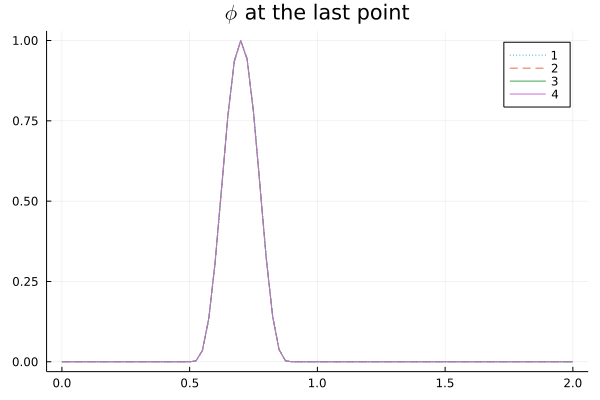

In [41]:
plot(t,ϕ_R_1[end,:],label="1",ls=:dot, title=L"\phi"*" at the last point")
plot!(t,ϕ_R_2[end,:],label="2",ls=:dash)
plot!(t,ϕ_R_3[end,:],label="3")
plot!(t,ϕ_R_4[end,:],label="4")

In [42]:
sum(abs.(ϕ_R_1[end,:] - ϕ_R_2[end,:]))/sum(abs.(ϕ_R_2[end,:] -ϕ_R_3[end,:]))

2.1366912921862298

In [43]:
sum(abs.(ϕ_R_2[end,:] - ϕ_R_3[end,:]))/sum(abs.(ϕ_R_3[end,:] -ϕ_R_4[end,:]))

1.9997032480697297